In [1]:
import os
os.chdir('../../../')
import SLEEPY as sl
import numpy as np

In [2]:
ex=sl.ExpSys(v0H=600,Nucs=['1H','13C'],vr=10000,T_K=298,
             rotor_angle=np.arccos(np.sqrt(1/3)),n_gamma=100,
             pwdavg=3,LF=[False,False])

In [3]:
ex=sl.ExpSys(v0H=600,Nucs=['1H','13C'])

In [4]:
delta=sl.Tools.dipole_coupling(.109,'1H','13C')  #Calculate H-C dipole for 1.05 Angstrom distance
ex.set_inter('dipole',i0=0,i1=1,delta=delta) #H-C dipole coupling
ex.set_inter('CSA',i=1,delta=100,eta=1) #13C CSA
_=ex.set_inter('CS',i=0,ppm=10) #1H isotropic chemical shift

In [5]:
_=ex.set_inter('dipole',i0=0,i1=1,delta=delta).set_inter('CSA',i=1,delta=100,eta=1).\
    set_inter('CS',i=0,ppm=10)

In [6]:
ex

2-spin system (1H,13C)
B0 = 14.092 T (600.000 MHz 1H frequency)
rotor angle = 54.736 degrees
rotor frequency = 10.0 kHz
Temperature = 298 K
Powder Average: JCP59 with 99 angles
Interactions:
	dipole between spins 0,1 with arguments:
		(delta=46656.38)
	CSA on spin 1 with arguments: (delta=100.00,eta=1.00)
	CS on spin 0 with arguments: (ppm=10.00)


In [7]:
ex.pwdavg.set_powder_type('rep256')

In [8]:
ex.pwdavg

Powder Average
Type:	rep256 with 25600 angles


<Axes3DSubplot:xlabel='x', ylabel='y'>

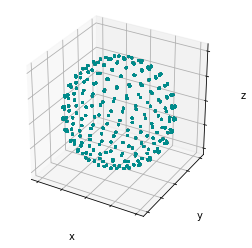

In [9]:
ex.pwdavg.plot()

In [10]:
ex.Op[0].x  #Example: x operator for the 0th spin

array([[0. +0.j, 0. +0.j, 0.5+0.j, 0. +0.j],
       [0. +0.j, 0. +0.j, 0. +0.j, 0.5+0.j],
       [0.5+0.j, 0. +0.j, 0. +0.j, 0. +0.j],
       [0. +0.j, 0.5+0.j, 0. +0.j, 0. +0.j]])

In [11]:
ex.Op[0].T[1][0] #eg m=-1 component of the rank-1 tensor for spin 0

array([[-0.        +0.j, -0.        +0.j, -0.70710678+0.j,
        -0.        +0.j],
       [-0.        +0.j, -0.        +0.j, -0.        +0.j,
        -0.70710678+0.j],
       [-0.        +0.j, -0.        +0.j, -0.        +0.j,
        -0.        +0.j],
       [-0.        +0.j, -0.        +0.j, -0.        +0.j,
        -0.        +0.j]])

In [12]:
ex.Op[0].T.set_mode('B0_LF')
ex.Op[0].T[2]

[array([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]), array([[0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
        [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
        [0.5+0.j, 0. +0.j, 0. +0.j, 0. +0.j],
        [0. +0.j, 0.5+0.j, 0. +0.j, 0. +0.j]]), array([[ 0.40824829+0.j,  0.        +0.j,  0.        +0.j,
          0.        +0.j],
        [ 0.        +0.j,  0.40824829+0.j,  0.        +0.j,
          0.        +0.j],
        [ 0.        +0.j,  0.        +0.j, -0.40824829+0.j,
         -0.        +0.j],
        [ 0.        +0.j,  0.        +0.j, -0.        +0.j,
         -0.40824829+0.j]]), array([[-0. +0.j, -0. +0.j, -0.5+0.j, -0. +0.j],
        [-0. +0.j, -0. +0.j, -0. +0.j, -0.5+0.j],
        [-0. +0.j, -0. +0.j, -0. +0.j, -0. +0.j],
        [-0. +0.j, -0. +0.j, -0. +0.j, -0. +0.j]]), array([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])]

In [13]:
T2spin=ex.Op[0].T*ex.Op[1].T
T2spin.set_mode('LF_RF')
T2spin[2]

[array([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]),
 array([[-0.  +0.j, -0.  +0.j, -0.25+0.j, -0.  +0.j],
        [-0.  +0.j, -0.  +0.j, -0.  +0.j,  0.25-0.j],
        [-0.  +0.j, -0.  +0.j, -0.  +0.j, -0.  +0.j],
        [-0.  +0.j, -0.  +0.j, -0.  +0.j, -0.  +0.j]]),
 array([[ 0.20412415+0.j,  0.        +0.j,  0.        +0.j,
          0.        +0.j],
        [ 0.        +0.j, -0.20412415+0.j,  0.        +0.j,
          0.        +0.j],
        [ 0.        +0.j,  0.        +0.j, -0.20412415+0.j,
          0.        +0.j],
        [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
          0.20412415+0.j]]),
 array([[ 0.  +0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j],
        [ 0.  +0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j],
        [ 0.25+0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j],
        [ 0.  +0.j, -0.25+0.j,  0.  +0.j,  0.  +0.j]]),
 array([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])]

In [14]:
T2spin.set_mode('homo')
T2spin[2]

[array([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]), array([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]), array([[ 0.20412415+0.j,  0.        +0.j,  0.        +0.j,
          0.        +0.j],
        [ 0.        +0.j, -0.20412415+0.j, -0.20412415+0.j,
          0.        +0.j],
        [ 0.        +0.j, -0.20412415+0.j, -0.20412415+0.j,
          0.        +0.j],
        [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
          0.20412415+0.j]]), array([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]), array([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])]

In [15]:
T2spin.set_mode('het')
T2spin[2]

[array([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]), array([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]), array([[ 0.20412415+0.j,  0.        +0.j,  0.        +0.j,
          0.        +0.j],
        [ 0.        +0.j, -0.20412415+0.j,  0.        +0.j,
          0.        +0.j],
        [ 0.        +0.j,  0.        +0.j, -0.20412415+0.j,
          0.        +0.j],
        [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
          0.20412415+0.j]]), array([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]), array([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])]